# Seaborn

The documentation of the functions can be found here: https://seaborn.pydata.org/api.html

Advantages:

+ Seaborn allows to plot a number of standard plots (often relevant in psychology) with minimal effort. Seaborn will calculate grouped averages, standard deviations and regression lines in the background.
+ Seaborn will label axes and legends using the labels in the data.

Disadvantages:

+ It is more difficult to fine-tune a Seaborn plot once it is plotted. The best approach is define styles, colors and labels *before* you create the plot.

In [7]:
import pandas
import seaborn
from matplotlib import pyplot

data_frame = pandas.read_csv('body.csv');
data_frame.head()

,Biacromial,Biiliac,Bitrochanteric,ChestDepth,ChestDia,ElbowDia,WristDia,KneeDia,AnkleDia,Shoulder,...,Bicep,Forearm,Knee,Calf,Ankle,Wrist,Age,Weight,Height,Gender
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


## The linear model plot - aka the regression plot

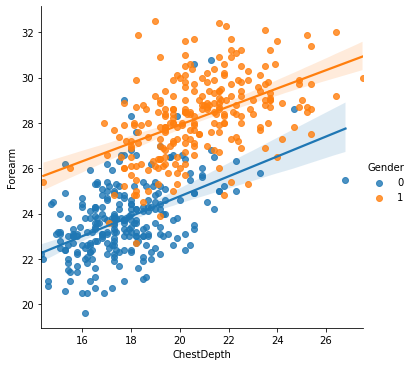

In [3]:
seaborn.lmplot(x='ChestDepth', y='Forearm', hue='Gender', data=data_frame);

In [9]:
data_frame['Sex'] = 'Female'
data_frame['Sex'][data_frame.Gender==1] = 'Male'

/home/dieter/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


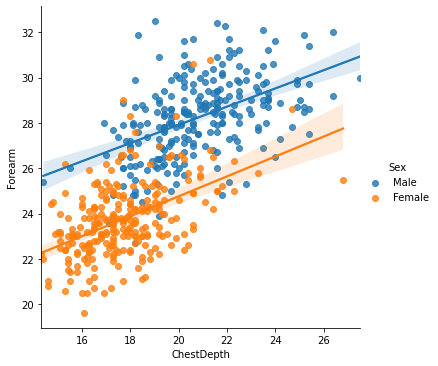

In [11]:
seaborn.lmplot(x='ChestDepth', y='Forearm', hue='Sex', data=data_frame);

## Colors

Seaborn provides a number of functions that allow specifying lists of colors (palettes) that will be used to plot data. See https://seaborn.pydata.org/api.html > Color Palettes.

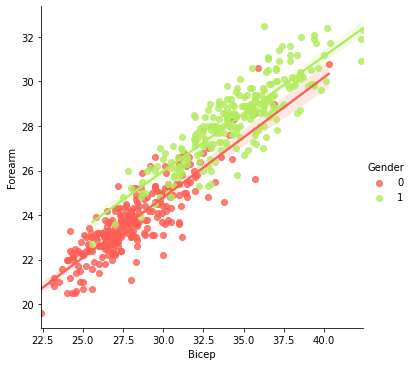

In [13]:
# https://en.wikipedia.org/wiki/List_of_Crayola_crayon_colors#Standard_colors
colors = ['Sunset Orange', 'Inchworm']
my_colors = seaborn.crayon_palette(colors)
seaborn.lmplot(x='Bicep', y='Forearm', hue='Gender', data=data_frame, palette=my_colors);

## Trick: Showing a color palette

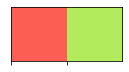

In [14]:
seaborn.palplot(my_colors)

## Plot style

Seaborn has five built-in themes to style its plots: ```darkgrid```, ```whitegrid```, ```dark```, ```white```, and ```ticks```. Seaborn defaults to using the ```darkgrid``` theme for its plots.

You can select another theme for your plots and you can change the settings of a theme.



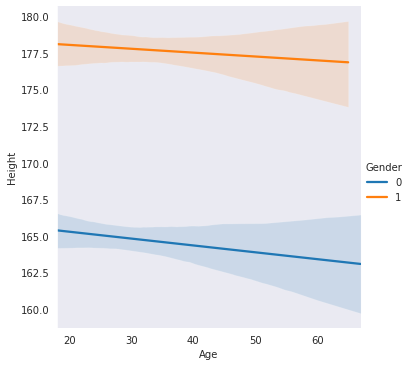

In [15]:
seaborn.set_style('darkgrid')
seaborn.set_style('dark')
seaborn.lmplot(x='Age', y='Height', hue='Gender',scatter=False, data=data_frame);

## Other types of plots

### The barplot

Seaborn makes it easy to plot complex barplots. This is more difficult in ```matplotlib.pyplot```.

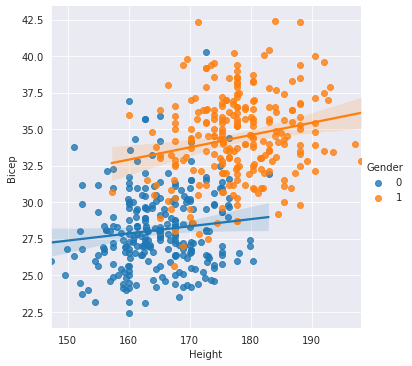

In [17]:
data_frame['Group'] = data_frame.Age < 25
seaborn.set_style('darkgrid')
seaborn.lmplot(x='Height', y='Bicep', hue='Gender', data=data_frame);

### Boxplot: showing non-gaussian spread

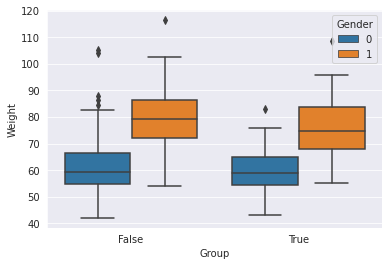

In [18]:
seaborn.boxplot(x='Group', y='Weight', hue='Gender', data=data_frame);

### Categorical plot

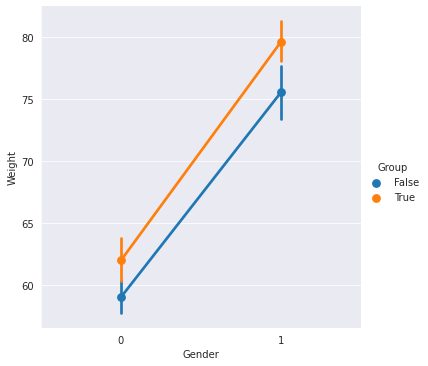

In [20]:
data_frame['Group'] = data_frame.Age > 25
seaborn.catplot(x='Gender', y='Weight',hue='Group', data=data_frame, kind='point');

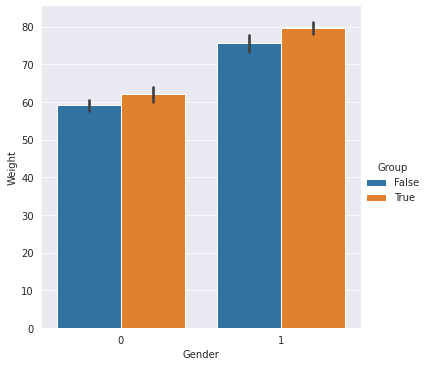

In [21]:
data_frame['Group'] = data_frame.Age > 25
seaborn.catplot(x='Gender', y='Weight',hue='Group', data=data_frame, kind='bar');

### Histograms

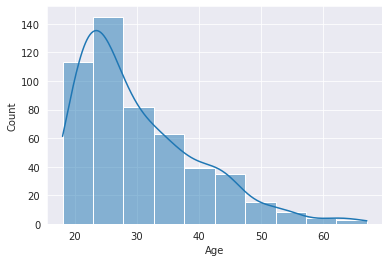

In [32]:
seaborn.histplot(x='Age', data=data_frame, bins=10, kde=True);

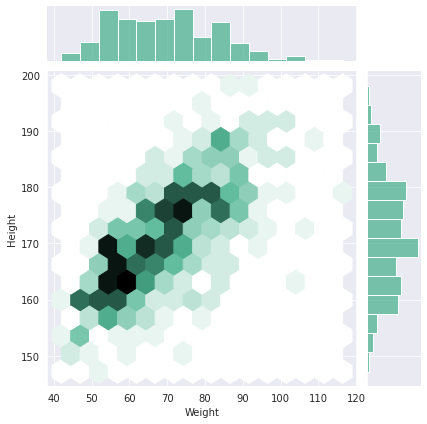

In [36]:
seaborn.jointplot(x='Weight', y='Height', kind="hex", color="#4CB391", data=data_frame);

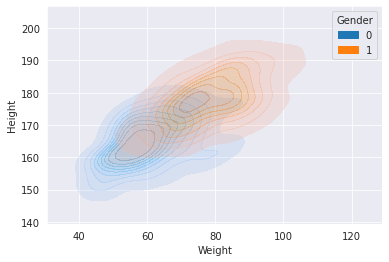

In [26]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
seaborn.kdeplot(
    data=data_frame,
    fill=True,
    alpha=0.25,
    x="Weight",
    y="Height",
    hue="Gender"
);
